In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('youtoxic_english_1000.csv')

In [7]:
data.sample(7)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
961,UgiWauybsgSl7XgCoAEC,TZxEyoplYbI,"Us police logic, ""Shit its a brick, Shoot them...",True,True,False,True,False,False,False,False,False,False,False,False
942,UgiDCU8p--JNoHgCoAEC,TZxEyoplYbI,i like how blacks can be all racist against wh...,True,False,False,False,False,True,True,False,False,False,False,False
846,Ugib2tzAuq79fngCoAEC,Dt9-byUhPdg,the real criminals are on wall street those gu...,True,True,False,True,False,False,False,False,False,False,False,False
512,UgjtqUBN4nZlJ3gCoAEC,9pr1oE34bIM,When did coming towards the officer is the sam...,False,False,False,False,False,False,False,False,False,False,False,False
698,UgzFhLRYl2-Jw_RjykN4AaABAg,cT14IbTDW2c,It's hilarious seeing these morons get hit by ...,True,True,False,True,False,False,False,False,False,False,False,False
289,UggKptArKFf9IngCoAEC,9pr1oE34bIM,How the did he get shot 3 times in the inside ...,False,False,False,False,False,False,False,False,False,False,False,False
427,UginHSF2kYVug3gCoAEC,9pr1oE34bIM,Ireland v England Riots 1995 (HQ),False,False,False,False,False,False,False,False,False,False,False,False


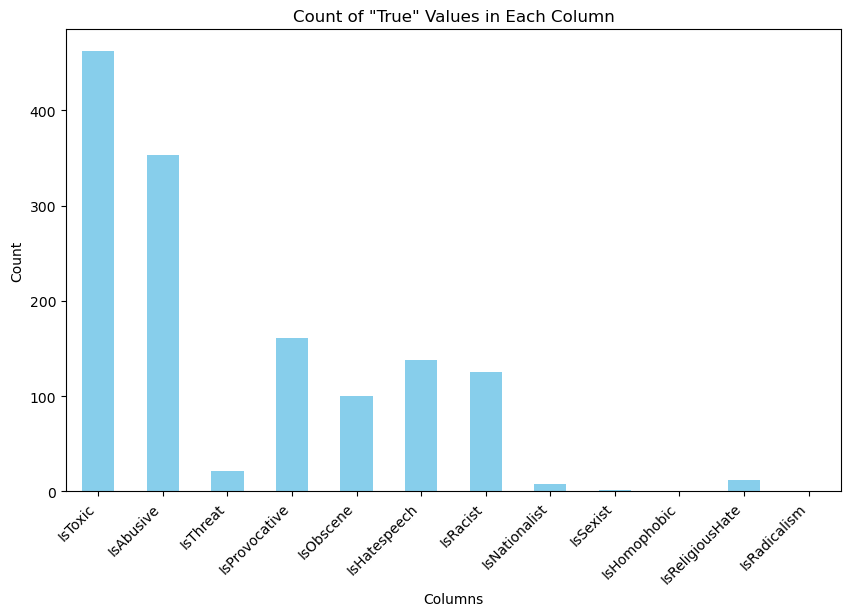

In [2]:
import matplotlib.pyplot as plt

boolean_columns = data.select_dtypes(include='bool')

true_counts = boolean_columns.sum()

plt.figure(figsize=(10, 6))
true_counts.plot(kind='bar', color='skyblue')
plt.title('Count of "True" Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()